## Week 8 Assignment

In this week's assignment we will load a dataset, tidy and reformat the data, and use matplotlib to generate interesting and useful data visuals. 

In [181]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

After importing our libraries, we will need to read the data. In this step we also specifiy the column names.

In [182]:
df = pd.read_fwf('C:/Users/cscam/auto+mpg/auto-mpg.data', 
                names=['MPG', 'Cylinders', 'Displacement', 'Horsepower', 
                       'Weight', 'Acceleration', 'Model Year', 'Origin', 'Car Name'])
df

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Car Name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,"""plymouth satellite"""
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,"""amc rebel sst"""
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,"""ford torino"""
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,"""ford mustang gl"""
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,"""vw pickup"""
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,"""dodge rampage"""
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,"""ford ranger"""


We have several rows in the 'Horsepower' column with '?' as a value:

In [183]:
df[df['Horsepower']=='?']

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Car Name
32,25.0,4,98.0,?,2046.0,19.0,71,1,"""ford pinto"""
126,21.0,6,200.0,?,2875.0,17.0,74,1,"""ford maverick"""
330,40.9,4,85.0,?,1835.0,17.3,80,2,"""renault lecar deluxe"""
336,23.6,4,140.0,?,2905.0,14.3,80,1,"""ford mustang cobra"""
354,34.5,4,100.0,?,2320.0,15.8,81,2,"""renault 18i"""
374,23.0,4,151.0,?,3035.0,20.5,82,1,"""amc concord dl"""


We can replace the '?' value with NaN so they will not be included in our analysis.

In [184]:
df['Horsepower'].replace('?', np.NaN, inplace = True)

In [185]:
df[df['Horsepower'].isnull()]

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Car Name
32,25.0,4,98.0,NaN,2046.0,19.0,71,1,"""ford pinto"""
126,21.0,6,200.0,NaN,2875.0,17.0,74,1,"""ford maverick"""
330,40.9,4,85.0,NaN,1835.0,17.3,80,2,"""renault lecar deluxe"""
336,23.6,4,140.0,NaN,2905.0,14.3,80,1,"""ford mustang cobra"""
354,34.5,4,100.0,NaN,2320.0,15.8,81,2,"""renault 18i"""
374,23.0,4,151.0,NaN,3035.0,20.5,82,1,"""amc concord dl"""


We can also assign strings representing country names to the integers in the 'Origin' column:

In [186]:
df['Origin'] = df['Origin'].map({1:'USA', 2:'Asia', 3:'Europe'})
df

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Car Name
0,18.0,8,307.0,130.0,3504.0,12.0,70,USA,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693.0,11.5,70,USA,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436.0,11.0,70,USA,"""plymouth satellite"""
3,16.0,8,304.0,150.0,3433.0,12.0,70,USA,"""amc rebel sst"""
4,17.0,8,302.0,140.0,3449.0,10.5,70,USA,"""ford torino"""
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,USA,"""ford mustang gl"""
394,44.0,4,97.0,52.00,2130.0,24.6,82,Asia,"""vw pickup"""
395,32.0,4,135.0,84.00,2295.0,11.6,82,USA,"""dodge rampage"""
396,28.0,4,120.0,79.00,2625.0,18.6,82,USA,"""ford ranger"""


Now that we have our dataset formatted properly, we can begin generating useful visuals.

First, lets generate a histogram showing the frequency distribution of the 'Cylinders' column:

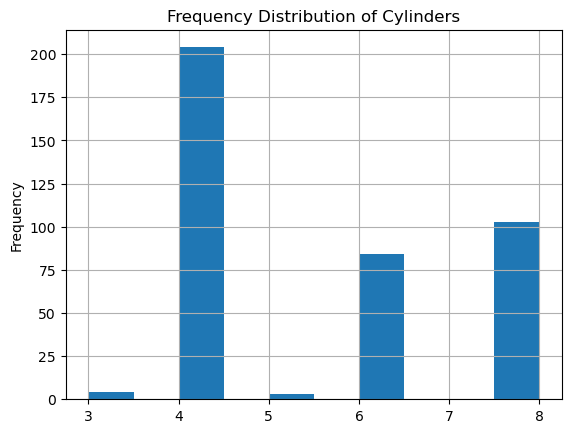

In [187]:
df['Cylinders'].plot(kind='hist', title='Frequency Distribution of Cylinders')
plt.grid()
plt.show()

Next, let's create a scatter plot to show the relationship between horsepower and weight.

For this to work, we first need to remove the NaN rows from the 'Horsepower' column, since they will raise an exception. We also need to convert the datatype of the 'Horsepower' column to float so the values will be presented in numerical order.

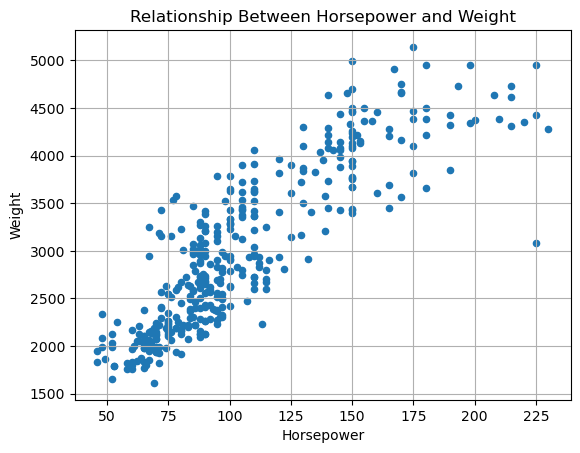

In [188]:
#remove NaN values:
df.dropna(subset=['Horsepower'], inplace=True)

#convert datatype:
conversion = {'Horsepower': float}
df = df.astype(conversion)

df.plot(kind='scatter', x='Horsepower', y='Weight', title='Relationship Between Horsepower and Weight');
plt.grid()
plt.show()

From this result we can see there is a positive relationship between horsepower and weight.

Finally, let's create a horizontal bar chart to show which countries manufacture cars with the highest horsepower:

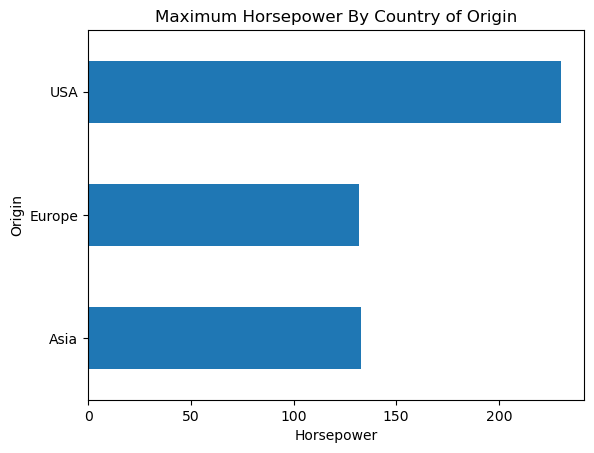

In [189]:
#use the groupby() and max() functions to find the max value of horsepower by country of origin:
x = df.groupby('Origin')['Horsepower'].max()

x.plot(kind='barh', title='Maximum Horsepower By Country of Origin');
plt.xlabel('Horsepower');

And here we clearly see that the United States by far produces the cars with the most horsepower, while Europe and Asia are both very close with one another.